In [57]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import fuzzytree
from fuzzytree import FuzzyDecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [5]:
temp = ["hot","hot","hot","mild","cool","cool","cool","mild","cool","mild","mild","mild","hot","mild"]
wind = ["weak","strong","weak","weak","weak","strong","strong","weak","weak","weak","strong","strong","weak","strong"]
traffic = ["long","long","long","long","short","short","short","long","short","short","short","long","short","long"]
driving = ["no","no","yes","yes","yes","no","yes","no","yes","yes","yes","yes","yes","no"]

In [6]:
data = pd.DataFrame([temp, wind, traffic, driving]).T
data.columns = ["temp", "wind", "traffic", "driving"]
data


,temp,wind,traffic,driving
0,hot,weak,long,no
1,hot,strong,long,no
2,hot,weak,long,yes
3,mild,weak,long,yes
4,cool,weak,short,yes
5,cool,strong,short,no
6,cool,strong,short,yes
7,mild,weak,long,no
8,cool,weak,short,yes
9,mild,weak,short,yes


In [7]:
labeler = LabelEncoder()
data["temp"] = labeler.fit_transform(data["temp"])
data["wind"]= labeler.fit_transform(data["wind"])
data["traffic"]= labeler.fit_transform(data["traffic"])
data["driving"]= labeler.fit_transform(data["driving"])

X = data.iloc[:,0:3]
Y = data.iloc[:,3]
print(X)
print(Y)

    temp  wind  traffic
0      1     1        0
1      1     0        0
2      1     1        0
3      2     1        0
4      0     1        1
5      0     0        1
6      0     0        1
7      2     1        0
8      0     1        1
9      2     1        1
10     2     0        1
11     2     0        0
12     1     1        1
13     2     0        0
0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: driving, dtype: int64


In [8]:
def entropy(target_col):
   elements, counts = np.unique(target_col,return_counts = True)
   entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
   return entropy

def infoGain(data,split_attribute_name,target_name):  
   totalEntropy = entropy(data[target_name])
   vals,counts= np.unique(data[split_attribute_name],return_counts=True)
   weightedEntropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
   informationGain = totalEntropy - weightedEntropy
   return informationGain


In [9]:
print("Information gain for temperature is: ",infoGain(data,"temp","driving"))
print("Information gain for wind is: ",infoGain(data,"wind","driving"))
print("Information gain for traffic is: ",infoGain(data,"traffic","driving"))

Information gain for temperature is:  0.02922256565895487
Information gain for wind is:  0.04812703040826949
Information gain for traffic is:  0.15183550136234159


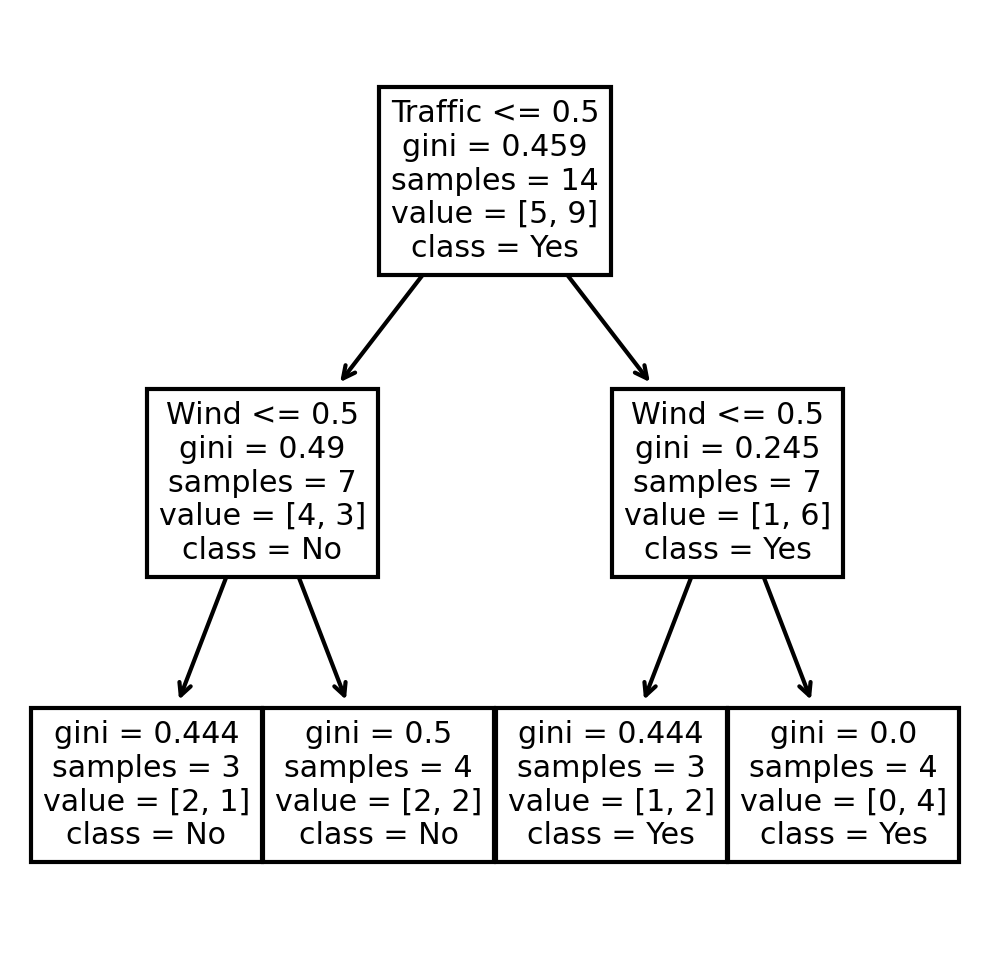

In [10]:
modelOne = DecisionTreeClassifier(max_depth = 2, 
                            random_state = 0)
modelOne.fit(X, Y)

features = ['Temperature','Wind','Traffic']
labels = ['No','Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(modelOne,
        feature_names = features,
        class_names=labels)
fig.savefig('treeOne.png')



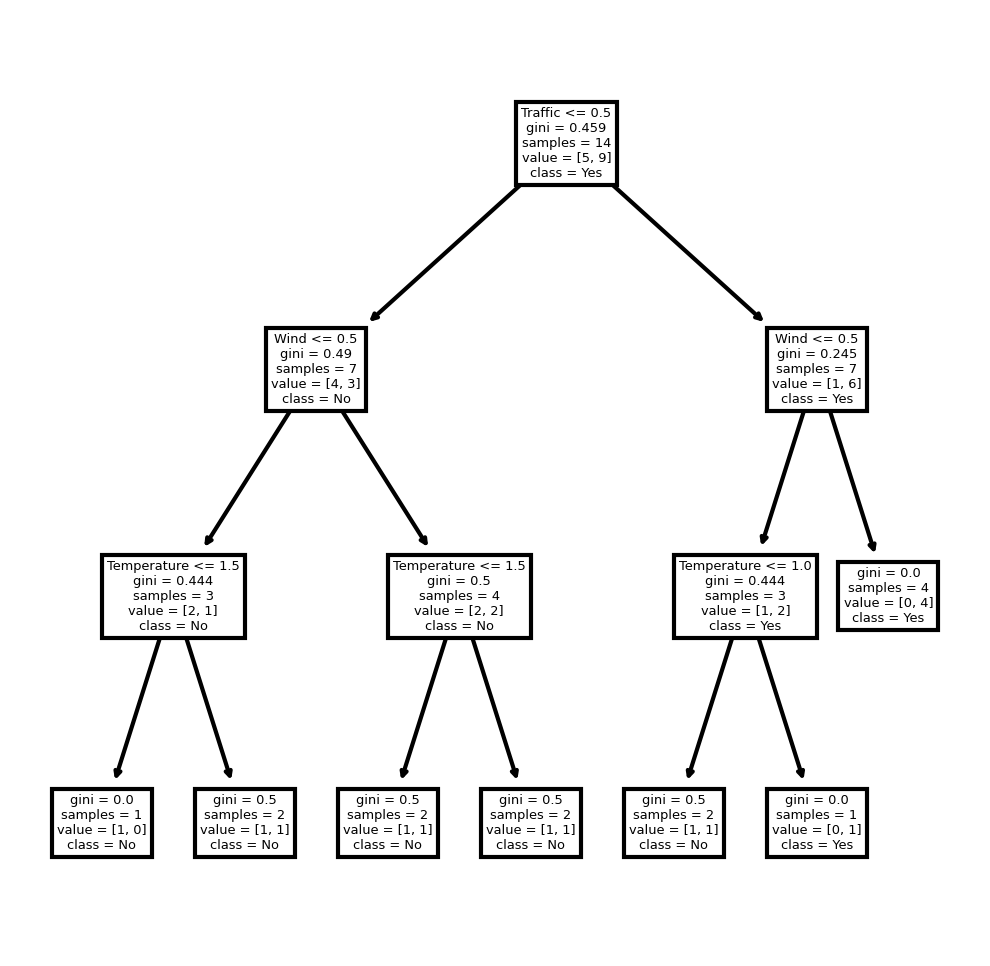

In [11]:
modelTwo = DecisionTreeClassifier(max_depth = 4, 
                            random_state = 0)
modelTwo.fit(X, Y)

features = ['Temperature','Wind','Traffic']
labels = ['No','Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(modelTwo,
        feature_names = features,
        class_names=labels)
fig.savefig('treeTwo.png')

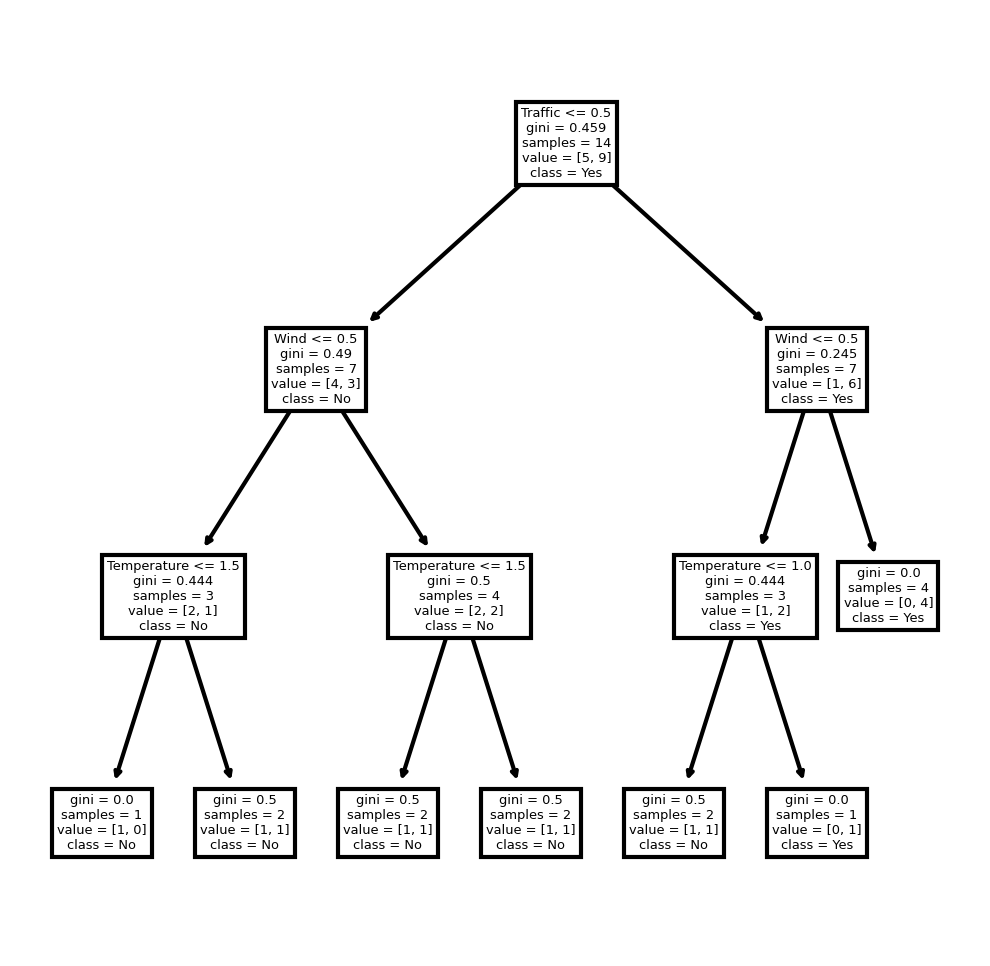

In [12]:
modelThree = DecisionTreeClassifier(max_depth = 10, 
                            random_state = 0)
modelThree.fit(X, Y)

features = ['Temperature','Wind','Traffic']
labels = ['No','Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(modelThree,
        feature_names = features,
        class_names=labels)
fig.savefig('treeThree.png')

In [60]:
fuzzyTree = FuzzyDecisionTreeClassifier(fuzziness = 0.8).fit(X,Y)

help(fuzzytree._fuzzy_tree.FuzzyTree)

Help on class FuzzyTree in module fuzzytree._fuzzy_tree:

class FuzzyTree(builtins.object)
 |  FuzzyTree(y, membership, level=0, rule=None, true_branch=None, false_branch=None)
 |  
 |  Fuzzy decision tree representation.
 |  
 |  Parameters
 |  ----------
 |  y : array-like of shape (n_samples,)
 |      The array of labels.
 |  membership : array-like of shape (n_samples,)
 |      The membership of samples that respective labels are
 |      coming from.
 |  level : int
 |      Depth of the node.
 |  rule : FuzzyDecisionRule, default=None
 |      The rule that was used to split this node. If None,
 |      then the node is a leaf.
 |  true_branch : FuzzyTree, default=None
 |      The child node containing labels of samples which
 |      memberships of were evaluated as non-zero by the
 |      fuzzy decision rule. If None, then the node is a leaf.
 |  false_branch : FuzzyTree, default=None
 |      The child node containing labels of samples which
 |      memberships of were evaluated as 

In [88]:
from skfuzzy import control as ctrl
import skfuzzy as fuzz

In [121]:
temp = ctrl.Antecedent(np.arange(0,2,.1), "temp")
wind = ctrl.Antecedent(np.arange(0,1,.1), "wind")
traffic = ctrl.Antecedent(np.arange(0,1,.1), "traffic")
driving = ctrl.Consequent(np.arange(0,1,.1), "driving")

tempName = ['cool','mild','hot']
windName = ['weak','strong']
trafficName = ['short', 'long']
wind.automf(names=windName)
temp.automf(names=tempName)
traffic.automf(names=trafficName)

driving['no'] = fuzz.trimf(driving.universe,(0,0,.5))
driving['yes'] = fuzz.trimf(driving.universe, (.5,.5,1))



/Users/coltonproctor/opt/anaconda3/lib/python3.8/site-packages/skfuzzy/control/term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/coltonproctor/opt/anaconda3/lib/python3.8/site-packages/skfuzzy/control/term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/coltonproctor/opt/anaconda3/lib/python3.8/site-packages/skfuzzy/control/term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


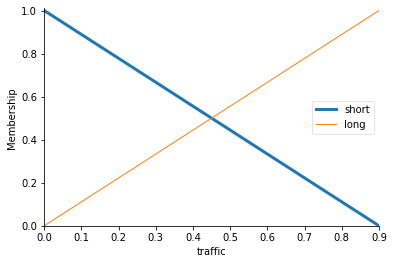

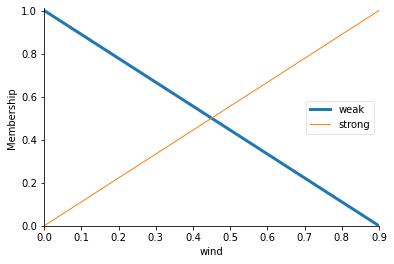

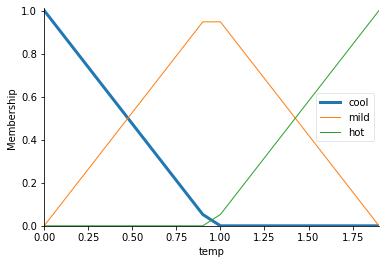

In [122]:
traffic['short'].view()
wind['weak'].view()
temp['cool'].view()

In [132]:
rule1 = ctrl.Rule(wind['weak'] & traffic['short'] & temp['cool'], driving['yes'])
rule2 = ctrl.Rule(wind['strong'] & traffic['long'] & temp['hot'], driving['no'])
rule3 = ctrl.Rule(wind['weak'] & traffic['short'] & temp['mild'], driving['yes'])
rule4 = ctrl.Rule(wind['weak'] & traffic['short'] & temp['mild'], driving['yes'])
rule5 = ctrl.Rule(wind['strong'] & traffic['long'] & temp['mild'], driving['no'])

controlSystem = ctrl.ControlSystem((rule1, rule2, rule3, rule4, rule5 ))
drive = ctrl.ControlSystemSimulation(controlSystem)


/Users/coltonproctor/opt/anaconda3/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/Users/coltonproctor/opt/anaconda3/lib/python3.8/site-packages/skfuzzy/control/controlsystem.py:133: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


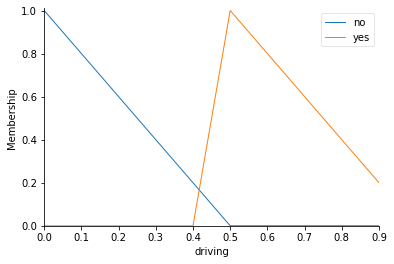

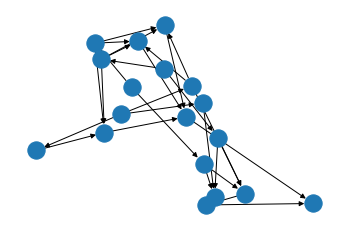

In [134]:
driving.view(sim=drive)
controlSystem.view()